<a href="https://colab.research.google.com/github/NicolasUnivesp/APIRestJava-SpringBoot/blob/master/C%C3%B3pia_de_com410_aula_10_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COM410 - Aprendizado de Máquinas - Semana 4
### Tutorial da videoaula 10: Aplicação do algoritmo SVM


Nesta aula, faremos uma tarefa de classificação com SVM. Vamos usar um conjunto de dados que contém sobre pessoas que realizaram compras a partir de propagandas nas suas redes sociais. Para rodar o algoritmo SVM, iremos usar as bibliotecas scikit-learn e Pandas. 

Sobre o Google Colab, recomendamos que, se necessário, reveja a videoaula Jupyter Notebook e Colab Google, videoaula 4 do curso COM350 - Introdução à Ciência de Dados (https://youtu.be/ZC8bfSZLl80) ou acesse a ferramenta no site https://colab.research.google.com/. Caso não tenha uma conta Google ou não queira usar, pode fazer também no Jupyter Notebook. 

A base de dados contém os seguintes campos:  

#### Compras em redes sociais

- **Age**: idade (em anos)
- **EstimatedSalary**: salário estimado (anual, em dólares)
Atributo classe:
- **Purchased**: comprado (1 - sim, 0 - não)

#### URL original do conjunto de dados
https://github.com/mk-gurucharan/Classification/blob/master/SocialNetworkAds.csv

Fonte: **Machine Learning Basics: Support Vector Machine (SVM) Classification**|. Gurucharan M. K., Towards Data Science.

URL: https://towardsdatascience.com/machine-learning-basics-support-vector-machine-svm-classification-205ecd28a09d

1. Nesta atividade, usaremos as bibliotecas **scikit-learn**, **pandas** e **matplotlib**. Importe as bibliotecas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize']=[15,10]

2. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 400 registros. 

In [ ]:
url = 'https://github.com/higoramario/univesp-com410-aprendizado-de-maquinas/raw/main/social-network-ads.csv'
compras = pd.read_csv(url, sep=',')
compras.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


**3**. Vamos ver as distribuições de idades e salários.

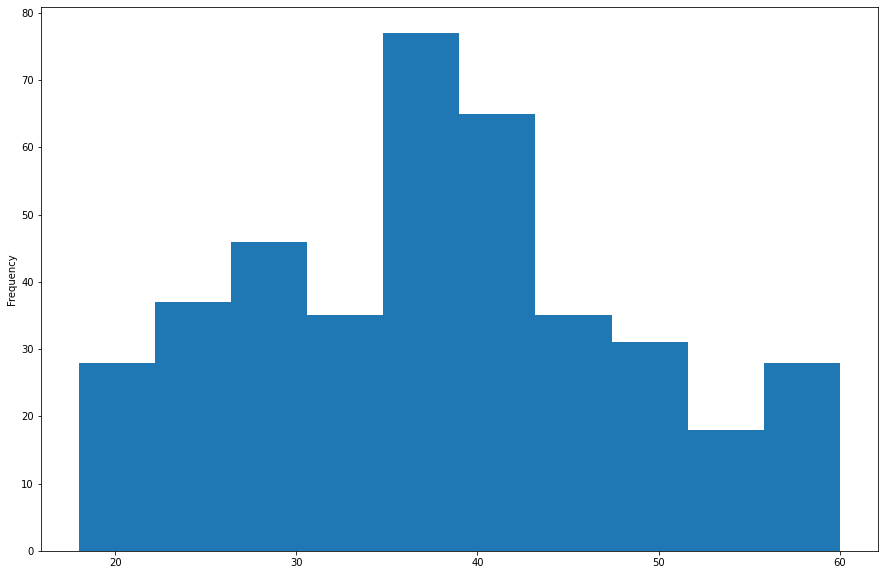

In [ ]:
compras['Age'].plot.hist()
plt.show()

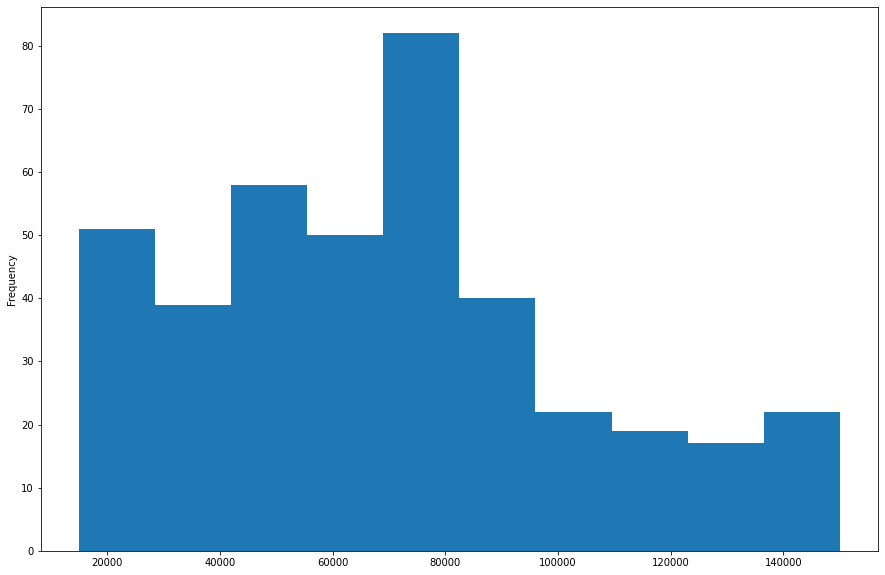

In [ ]:
compras['EstimatedSalary'].plot.hist()
plt.show()

4. Que tal olhar a distribuição espacial dos dados?

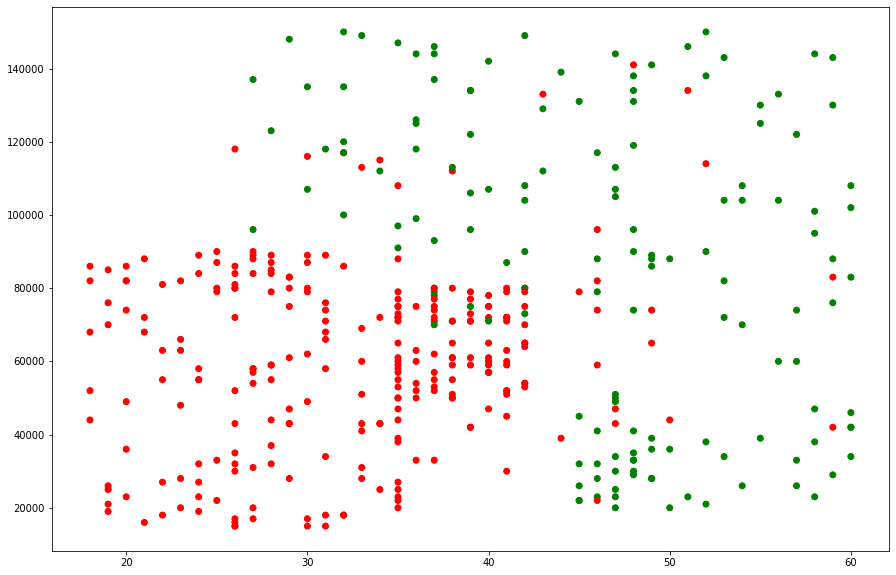

In [ ]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(compras['Age'], compras['EstimatedSalary'], c=compras['Purchased'].map(colors))
plt.show()

5. Agora, dividimos os os dados entre treinamento (90%) e teste (10%).

In [ ]:
atributos = compras[['Age','EstimatedSalary']]
classes = compras['Purchased']

In [ ]:
compras_treino, compras_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size = 0.1)

6. Vamos diminuir a escala dos dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados.

In [ ]:
scaler = StandardScaler()
compras_treino = scaler.fit_transform(compras_treino)
compras_teste = scaler.transform(compras_teste)

7. Vamos plotar o resultado olhando como o modelo classifica o conjunto de testes. Para isso, vamos criar uma função que usa as funções **meshgrid** do numpy, que cria um grid retangular, e **contourf** do matplotlib, que permite criar linhas e preencher áreas com cores.

In [ ]:
#função que recebe os atributos e classes do conjunto de testes, o classificador SVM e plota os resultados
def visualizarSVM(atributos_t,classes_t,classificador):
  atributos, classes = atributos_t, classes_t

  ano, salario = np.meshgrid(np.arange(start = atributos[:, 0].min() - 1, stop = atributos[:, 0].max() + 1, step = 0.01),
                      np.arange(start = atributos[:, 1].min() - 1, stop = atributos[:, 1].max() + 1, step = 0.01))

  plt.contourf(ano, salario, classificador.predict(np.array([ano.ravel(), salario.ravel()]).T).reshape(ano.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))

  plt.xlim(ano.min(), ano.max())
  plt.ylim(salario.min(), salario.max())

  for i, j in enumerate(np.unique(classes)):
      plt.scatter(atributos[classes == j, 0], atributos[classes == j, 1],
                  color = ListedColormap(('red', 'green'))(i), label = j)

  plt.title('Classificação SVM')
  plt.xlabel('Ano')
  plt.ylabel('Salário estimado')
  plt.legend()
  plt.show()

8. Agora vamos treinar o modelo para gerar o classificador usando a função kernel polinomial.

Os seguintes parâmetros de funções de kernel podem ser usados para aprimorar o modelo:

**C**: determina se a margem será mais ajustada (C grande) ou mais larga (C pequeno)

**gamma**: parâmetro de ajuste para as funções polinomial e sigmoidal

**coef0**: parâmetro kappa, constante usada nas funções polinomial e sigmoidal

**degree**:grau da função polinomial

In [ ]:
SVM_polinomial = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(compras_treino, classes_treino)

SVC(coef0=2, kernel='poly')

9. Verificando a acurácia de classificação.

In [ ]:
predicao = SVM_polinomial.predict(compras_teste)
acuracia = accuracy_score(classes_teste,predicao)
print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de classificação: 90.0%


10. Vamos plotar o classificador que usa a função polinomial.

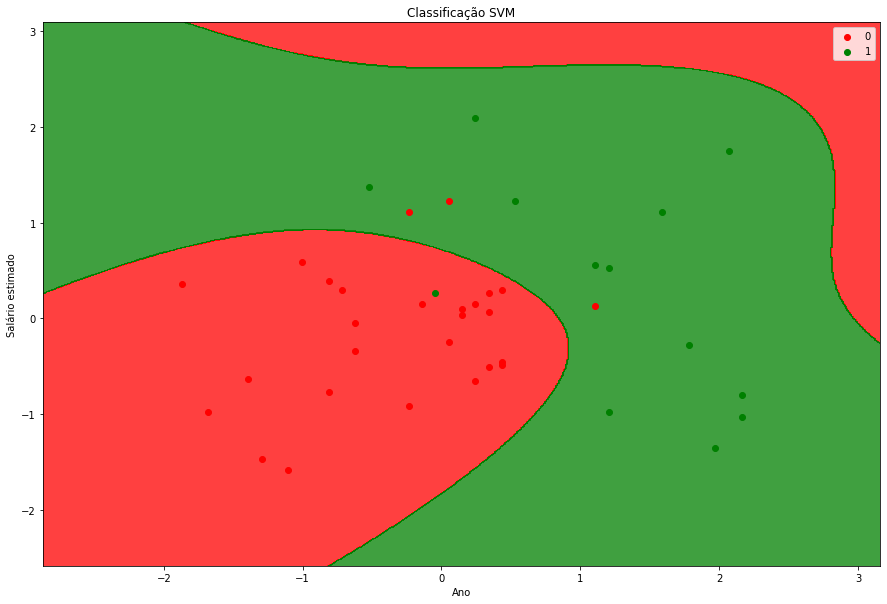

In [ ]:
visualizarSVM(compras_teste, classes_teste,SVM_polinomial)

11. Agora vamos treinar o modelo para gerar o classificador usando a função kernel polinomial.

In [ ]:
SVM_sigmoidal = SVC(kernel = 'sigmoid', gamma = 'scale', C = 0.2, coef0 = 2)
SVM_sigmoidal.fit(compras_treino, classes_treino)

SVC(C=0.2, coef0=2, kernel='sigmoid')

In [ ]:
predicao_sigmoidal = SVM_sigmoidal.predict(compras_teste)
acuracia_sigmoidal = accuracy_score(classes_teste,predicao_sigmoidal)
print('Acurácia de classificação: {}'.format(round(acuracia_sigmoidal,3)*100)+'%')

Acurácia de classificação: 65.0%


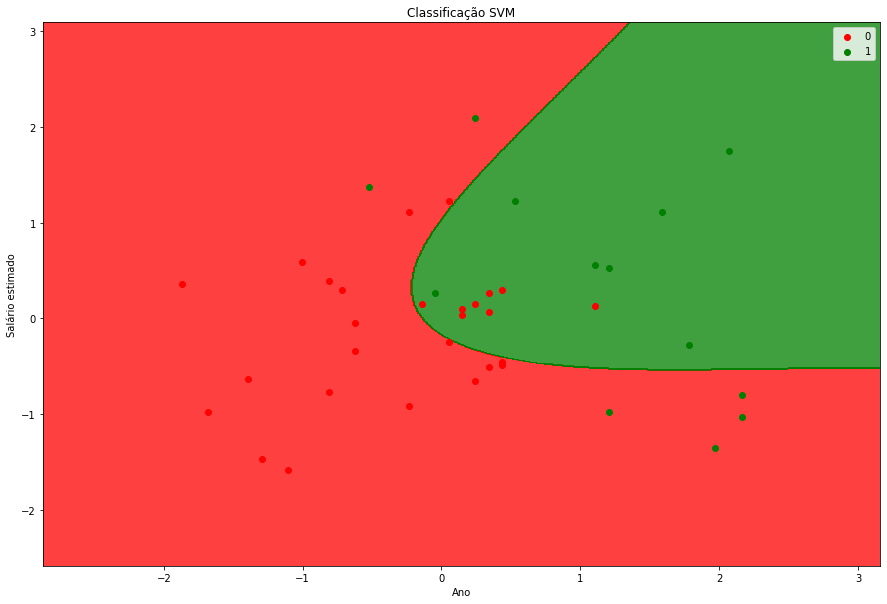

In [ ]:
visualizarSVM(compras_teste, classes_teste,SVM_sigmoidal)

Os resultados mostram que os classificadores gerados conseguem classificar bem o perfil de idade e renda que compra ou não por meio de anúncios nas redes sociais, principalmente o que usa a função kernel polinomial. 

Experimente ver os resultados usando alterando as funções kernel e seus parâmetros para ver se consegue melhores resultados.

**Versões das bibliotecas**

Esse tutorial está usando as seguintes versões de bibliotecas: 

matplotlib==3.2.2

numpy==1.21.6

pandas==1.3.5

scikit-learn==1.0.2